# Wine Quality Analysis
Can we predict the quality of Portuguese "Vinho Verde" wine? (score: 0-10)

Data Source: 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
df = pd.read_csv('winequality-red.csv')

Red Wine Mean Rating: 5.6360225140712945


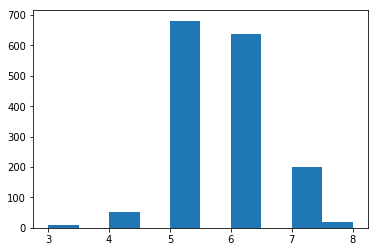

In [3]:
# Histogram of Quality
plt.hist(df['quality'])

print('Red Wine Mean Rating:', df['quality'].mean())
# we see very few red wines of high/low quality

In [4]:
# Categorize quality into good/bad bins -> outliers will fall in good/bad 
bins = (1, 5.5, 8)
categories = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=categories)

In [5]:
quality_category = LabelEncoder()

In [6]:
# Categories have binary labels (0=bad, 1=good)
df['quality'] = quality_category.fit_transform(df['quality'])

In [7]:
# Separate predictors from response
X = df.iloc[:,:11]
y = df.iloc[:,11]

Feature Selection- Recursive Feature Elimination
Recursively remove attributes, and build model on remaining attributes. Model's accuracy will identify which attributes contribute most to predicting the target.

In [8]:
# Base classifier used to evaluate subset of attributes
estimator = LogisticRegression()

In [9]:
# RFE Feature Selection
# selecting 9 attributes removes multicollinearity problem
selector = RFE(estimator, 9) 
selector = selector.fit(X, y)

In [10]:
# selected (best) features are assigned rank 1
print(selector.support_)
print(selector.ranking_)

[False  True  True  True  True  True False  True  True  True  True]
[3 1 1 1 1 1 2 1 1 1 1]


In [11]:
# Keep features at indexes that are 1
feature_list = []
for i in range(len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        feature_list.append(i)

X = X.iloc[:, feature_list]

In [12]:
# Multiple Linear Regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     343.9
Date:                Tue, 02 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:27:26   Log-Likelihood:                -904.45
No. Observations:                1599   AIC:                             1827.
Df Residuals:                    1590   BIC:                             1875.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
volatile acidity       -0.6375      0.076     -8.413      0.000      -0.786      -0.489
citric acid            -0.1945      0.081     -2.403      0.016      -0.353      -0.036
residual sugar          0.0007      0.008      0.087      0.931      -0.015       0.016
chlorides              -0.7771      0.265     -2.932      0.003      -1.297      -0.257
free sulfur dioxide    -0.0023      0.001     -2.171      0.030      -0.004      -0.000
density                -0.5527      0.302     -1.832      0.067      -1.144       0.039
pH                     -0.1675      0.088     -1.908      0.057      -0.340       0.005
sulphates               0.4916      0.073      6.748      0.000       0.349       0.634
alcohol                 0.1735      0.011     15.631      0.000       0.152       0.195
==============================================================================
Omnibus:                      337.089   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.967
Skew:                           0.038   Prob(JB):                     4.74e-15
Kurtosis:                       2.008   Cond. No.                         644.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From R-squared, we see that the model explains 66.1% of the variance of the dependent variable (quality).

As volatile acidity increases by 1, quality decreases by 0.6375. 
etc...

In [13]:
# Split red/white datasets into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Scale values -> better understood by ML algorithms
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
# From sklearn- Linear Regression
linModel = LinearRegression()
linModel = linModel.fit(X_train, y_train)
linPredictions = linModel.predict(X_test)

In [16]:
print("Score: ", linModel.score(X_test, y_test))

Score:  0.2054235186198623


In [17]:
# From sklearn- Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.69      0.76      0.73       134
          1       0.82      0.76      0.79       186

avg / total       0.76      0.76      0.76       320



Based on these two models, we see that Random Forest Classification (81%) does much better than Multiple Linear Regression (28.59%) at predicting wine quality. 